In [18]:
from numpy.polynomial import Legendre, Polynomial
from scipy.integrate import quad
from scipy.optimize import approx_fprime
from matplotlib.colors import TwoSlopeNorm
from scipy.integrate import solve_ivp
from scipy.linalg import expm
import matplotlib.pyplot as pp
import numpy as np


In [19]:
def leg_basis(n: int):
    #Purpose of this is to return, the constructor is we are creating an array
    # of n elements and the 1 value will appear at the P_n(x) position.
    return Legendre([0] * n + [1])

def inner_prod(a: Legendre, b: Legendre):
    #Quadrature here is essentially establishing the L^2 integral within [-1,1]
    return quad(lambda x: a(x) * b(x), -1, 1)[0]

def proj_leg(f, n: int):
    #perform Legendre projection
    coefs = [inner_prod(f, leg_basis(i)) for i in range(n)]
    coefs = np.array(coefs)

    return (2 * np.arange(n) + 1) / 2 * coefs

In [20]:
def f(x):
    return 2 * x**2 - 3 * x - 0.5
    #return -x**2 + 1.25 * x + 0.333
    #return x - 0.5
    return x**4 - 0.5

def coef_t(t):
    phi = lambda x: (x + 1) / 2 * t #performs scaling from [-1, 1] to [0,t]
    g = lambda x: f(phi(x))

    return proj_leg(g, n=5)

In [21]:
t = np.linspace(1.0, 10.0, 40)
c = np.stack([coef_t(t_) for t_ in t]) #provides the trajectory of the Legendre projection
dcdt = np.stack([approx_fprime(t_, coef_t)[:, 0] for t_ in t]) #numerically computes time derivative
# of each coefficient, giving a 40 x 5 matrix. This allows us to form the differential equation
# dc/dt = Ac_t + Bf(t)

In [22]:
A, res, rank, singular_values = np.linalg.lstsq(c, dcdt, rcond = None)
#This here solves the least-squares regression:
# cA^\top \approx dc/dt
#A is the empirical HiPPO matrix
A

array([[ 3.00000022e+00,  2.99999971e+00, -4.68703869e-08,
        -1.80284707e-08, -4.81572249e-08],
       [-3.88888915e+00, -4.33333298e+00, -4.44444376e-01,
         2.37734706e-08,  5.26663595e-08],
       [ 5.66666700e+00,  6.99999956e+00,  1.33333324e+00,
        -2.91401017e-08, -6.11244382e-08],
       [ 1.06812376e-13,  1.23602531e-13,  1.67901687e-14,
        -5.95696655e-22, -1.34027663e-21],
       [ 8.95989696e-14,  1.03581172e-13,  1.39822138e-14,
        -5.00281051e-22, -1.12658815e-21]])

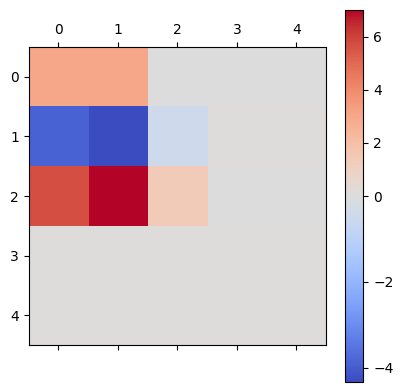

In [23]:
pp.matshow(A, norm=TwoSlopeNorm(0), cmap="coolwarm")
pp.colorbar()